In [57]:
import pandas as pd

df = pd.read_csv('./data/boston.csv')
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


(None,
              CRIM          ZN       INDUS        CHAS          NX          RM  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
 std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
 min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
 25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
 50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
 75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
 max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   
 
               AGE         DIS         RAD         TAX     PTRATIO           B  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
 std   

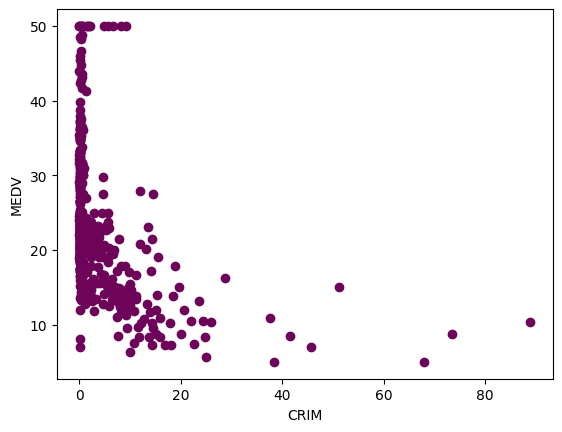

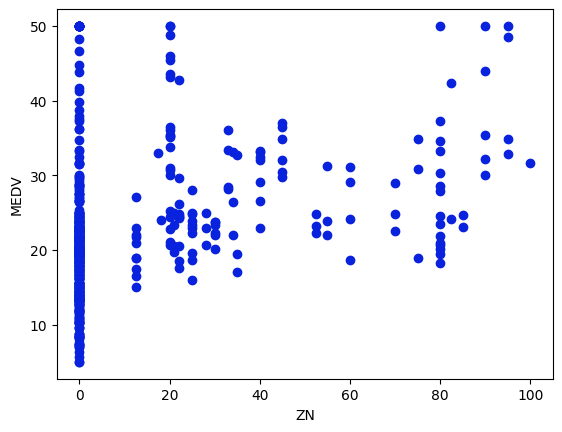

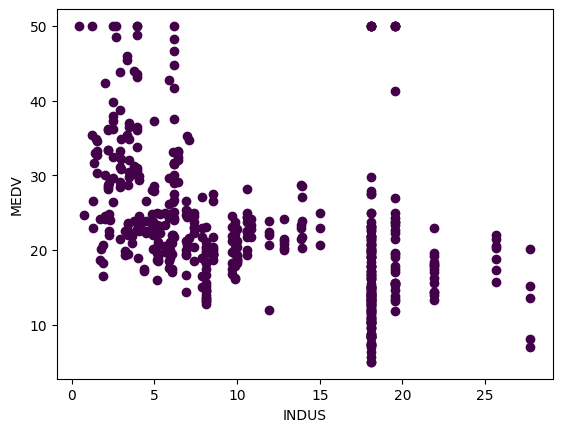

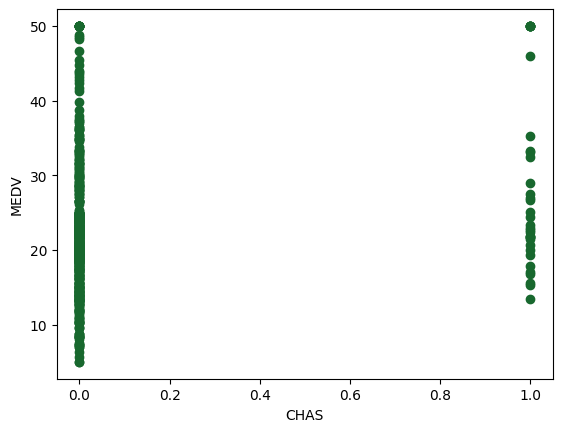

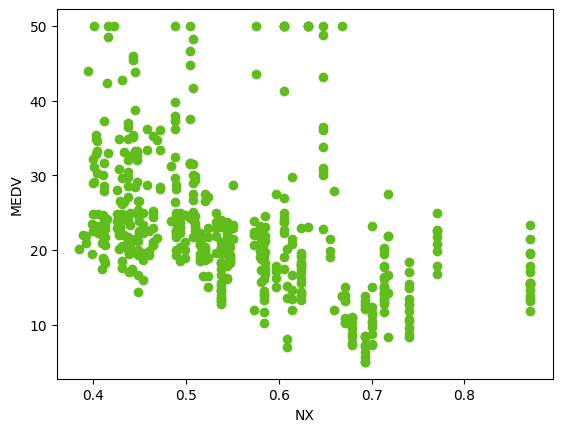

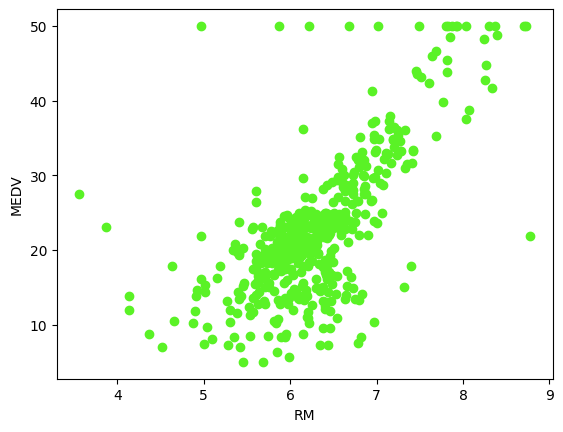

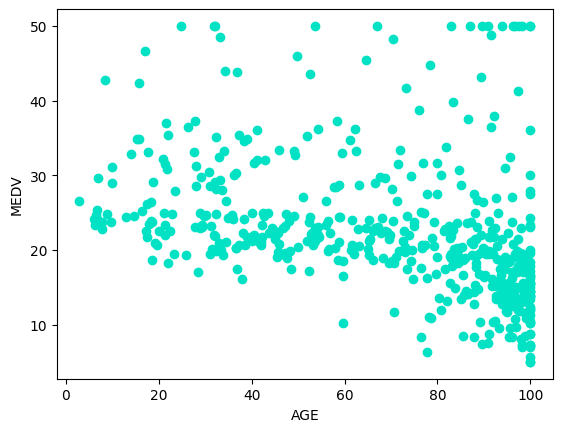

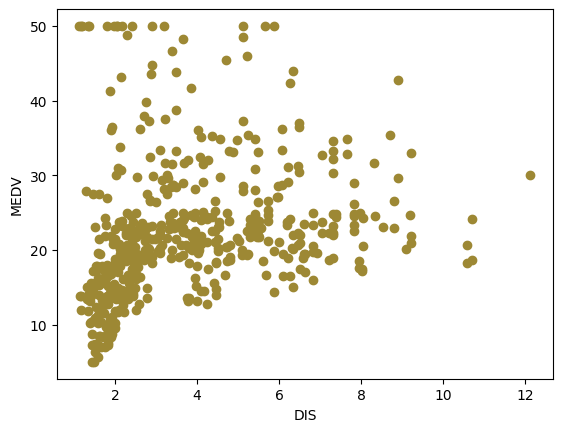

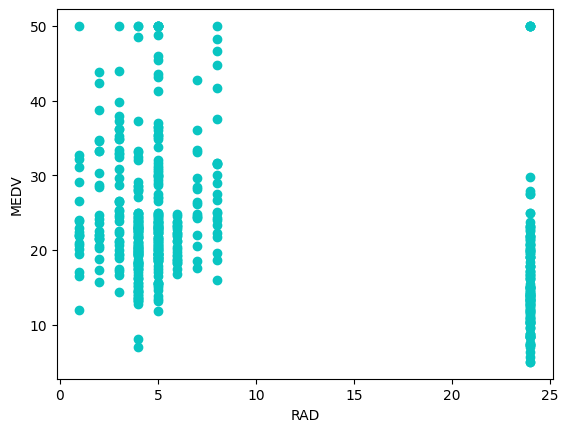

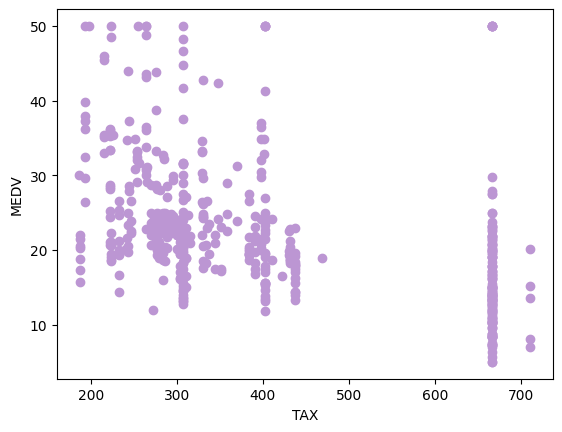

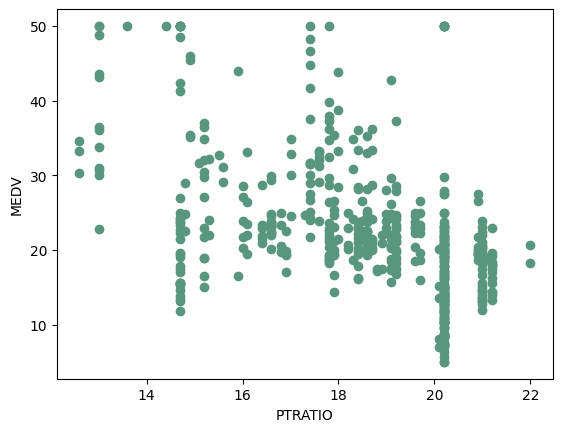

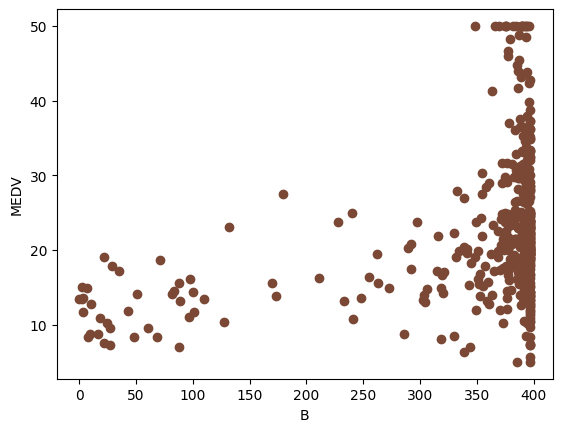

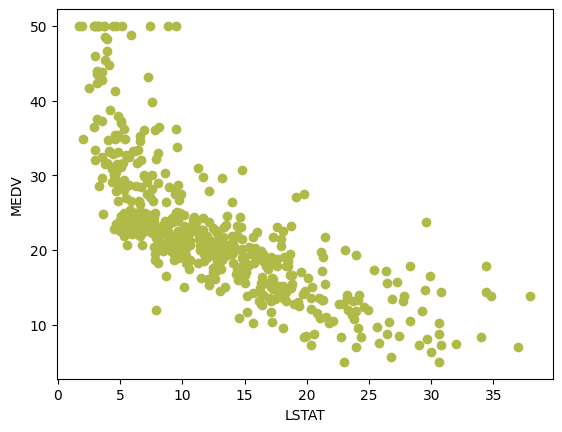

In [105]:
import matplotlib.pyplot as plt
import numpy as np

y = df['MEDV']
X = df.drop(['MEDV'], axis=1)

for col in X.columns:
    # 生成随机颜色值
    color = np.random.rand(3)
    plt.scatter(df[col], y, color=color)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()

In [107]:
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_train_scaled, y, test_size=0.2, random_state=33)


class Network(nn.Module):
    def __init__(self, n_features):
        super(Network, self).__init__()
        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        return self.linear(x)


lr = 0.01
iterations = 100000
n_features = X_train.shape[1]
model = Network(n_features)
criteria = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train.values).float().view(-1, 1)

for i in range(iterations):
    model.zero_grad()
    out = model(X_train_tensor)
    loss = criteria(out, y_train_tensor)
    loss.backward()
    optimizer.step()
    if i % 1000 == 0:
        print('loss:', loss.item())

loss: 613.3873901367188
loss: 209.10426330566406
loss: 69.82058715820312
loss: 28.340591430664062
loss: 22.364755630493164
loss: 22.1344051361084
loss: 22.133455276489258
loss: 22.13345718383789
loss: 22.133455276489258
loss: 22.133455276489258
loss: 22.133455276489258
loss: 22.13345718383789
loss: 22.133455276489258
loss: 22.133455276489258
loss: 22.133455276489258
loss: 22.13348960876465
loss: 22.13345718383789
loss: 22.13346290588379
loss: 22.133453369140625
loss: 22.133455276489258
loss: 22.133455276489258
loss: 22.13347816467285
loss: 22.133455276489258
loss: 22.13345718383789
loss: 22.133455276489258
loss: 22.133460998535156
loss: 22.133455276489258
loss: 22.133455276489258
loss: 22.13345718383789
loss: 22.133455276489258
loss: 22.133455276489258
loss: 22.133455276489258
loss: 22.133455276489258
loss: 22.133487701416016
loss: 22.133474349975586
loss: 22.133455276489258
loss: 22.133455276489258
loss: 22.133455276489258
loss: 22.133472442626953
loss: 22.13347816467285
loss: 22.1334

In [108]:
# 模型评估
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test.values).float().view(-1, 1)
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    loss = criteria(y_pred, y_test_tensor)
    print('test loss:', loss.item())

test loss: 22.042583465576172
